In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 
import matplotlib as mpl
mpl.rcParams['figure.dpi']
import graphviz

In [2]:
df=pd.read_csv('train.csv')
tf=pd.read_csv('test.csv')
tf=tf.columns.tolist()
features_response=df.columns.tolist()
items_to_remove=['PassengerId']
features_response = [item for item in features_response if item not in items_to_remove ]
features_response

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X=pd.get_dummies(X)
X=X.fillna(X.median(numeric_only=True))

y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=24)

In [23]:
dt=tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


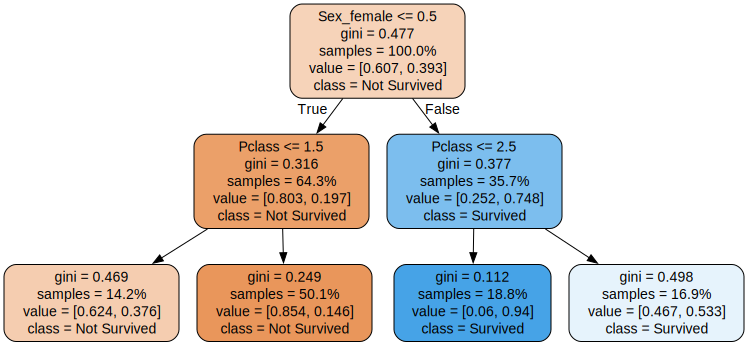

In [26]:
dot_data=tree.export_graphviz(dt,out_file=None,filled=True,rounded=True,feature_names=X.columns,proportion=True,class_names=['Not Survived','Survived'])
graph=graphviz.Source(dot_data)
graph